In [3]:
import pandas as pd
import numpy as np



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

churn_file = pd.read_csv('/content/CustomerChurn_dataset.csv')
churn_file= pd.DataFrame(churn_file)
churn_file.head()
#churn_file.tail()
churn_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Pre-processing

Dropping repeated or duplicate data and missing values

In [7]:
churn_file = churn_file.drop_duplicates()

#checking to see if there are missing values in the churn_file dataset
def has_missing_values(churn_file):
  return churn_file.isna().any().any()
#using if else to finally print out the result
if has_missing_values(churn_file):
  print("has missing values")
else:
  print("no missing values")

  #Since there are no missing values, no need to use the drop.na() function


no missing values


Seperating features into numeric and non-numeric:

In [8]:

#Take customerID out, it's not a useful feature for predicting churning outcomes

if 'customerID' in churn_file.columns:
  churn_file.drop('customerID', axis=1, inplace=True)
else:
  print("CustomerID not found")
#churn_file.head()

#Convert object to float for the TotalCharges column
churn_file['TotalCharges']= pd.to_numeric(churn_file['TotalCharges'], errors='coerce', downcast= 'float')

#select numeric columns
churn_numeric = churn_file.select_dtypes(include = ['int64', 'float64','float32'])
churn_numeric = pd.DataFrame(churn_numeric)
churn_numeric
#Select categoric columns
churn_categoric = churn_file.select_dtypes(exclude = ['int64', 'float64','float32'])
churn_categoric = pd.DataFrame(churn_categoric)
churn_categoric




,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


Label Encoding and Imputation

In [9]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Since I am using one-hot encoding and label encoding, it is better to impute before encoding since one-hot encoding cannot directly handle missing categorical data
#Where most_frequent means mode
imputer_ = SimpleImputer(strategy='most_frequent')

# impute for categorical columns
final_churn_categoric = imputer_.fit_transform(churn_categoric)
final_churn_categoric = pd.DataFrame(final_churn_categoric, columns=churn_categoric.columns)

# Impute for numeric columns(median could also work here in place of mean)
numeric_imputer = SimpleImputer(strategy='mean')
churn_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(churn_numeric), columns=churn_numeric.columns)

# Doing Label Encoding for the categorical columns only
label_encoder = LabelEncoder()
for column in final_churn_categoric.columns:
    final_churn_categoric[column] = label_encoder.fit_transform(final_churn_categoric[column])

#Concating both the imputed numeric columns with the imputed and encoded categorical columns into one whole dataframe
final_churn_file = pd.concat([churn_numeric_imputed, final_churn_categoric], axis=1)

#printing the final dataframe to see how it looks
print(final_churn_file)
final_churn_file.info()

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender  Partner  \
0               0.0     1.0           29.85     29.850000       0        1   
1               0.0    34.0           56.95   1889.500000       1        0   
2               0.0     2.0           53.85    108.150002       1        0   
3               0.0    45.0           42.30   1840.750000       1        0   
4               0.0     2.0           70.70    151.649994       0        0   
...             ...     ...             ...           ...     ...      ...   
7038            0.0    24.0           84.80   1990.500000       1        1   
7039            0.0    72.0          103.20   7362.899902       0        1   
7040            0.0    11.0           29.60    346.450012       0        1   
7041            1.0     4.0           74.40    306.600006       1        1   
7042            0.0    66.0          105.65   6844.500000       1        0   

      Dependents  PhoneService  MultipleLines  InternetService 

Feature Selection (QUESTION 1)

In [10]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialization
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

#specifying the target variable
target_variable = final_churn_file['Churn']
rf_classifier.fit(final_churn_file, target_variable )

# Extract the feature importances and create a dataframe for them
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_dataframe = pd.DataFrame({'Feature': final_churn_file.columns, 'Importance': feature_importances})

#This prints the features importance in a descending order because of the (by='Importance', ascending=False) command
feature_importance_dataframe= feature_importance_dataframe.sort_values(by='Importance', ascending=False)
print(feature_importance_dataframe)






             Feature  Importance
19             Churn    0.766652
16          Contract    0.051611
1             tenure    0.037828
10    OnlineSecurity    0.025901
3       TotalCharges    0.024908
2     MonthlyCharges    0.022657
13       TechSupport    0.017283
9    InternetService    0.010614
11      OnlineBackup    0.009980
18     PaymentMethod    0.007565
12  DeviceProtection    0.006045
17  PaperlessBilling    0.003225
15   StreamingMovies    0.002557
8      MultipleLines    0.002377
4             gender    0.002212
14       StreamingTV    0.002089
5            Partner    0.002012
0      SeniorCitizen    0.002008
6         Dependents    0.001941
7       PhoneService    0.000534


EDA (QUESTION 2)

In [11]:
#To view my numeric features statistical characteristics
print(final_churn_file.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges       gender  \
count    7043.000000  7043.000000     7043.000000   7043.000000  7043.000000   
mean        0.162147    32.371149       64.761692   2283.300441     0.504756   
std         0.368612    24.559481       30.090047   2265.000259     0.500013   
min         0.000000     0.000000       18.250000     18.799999     0.000000   
25%         0.000000     9.000000       35.500000    402.225006     0.000000   
50%         0.000000    29.000000       70.350000   1400.550049     1.000000   
75%         0.000000    55.000000       89.850000   3786.599976     1.000000   
max         1.000000    72.000000      118.750000   8684.799805     1.000000   

           Partner   Dependents  PhoneService  MultipleLines  InternetService  \
count  7043.000000  7043.000000   7043.000000    7043.000000      7043.000000   
mean      0.483033     0.299588      0.903166       0.940508         0.872923   
std       0.499748     0.458110     

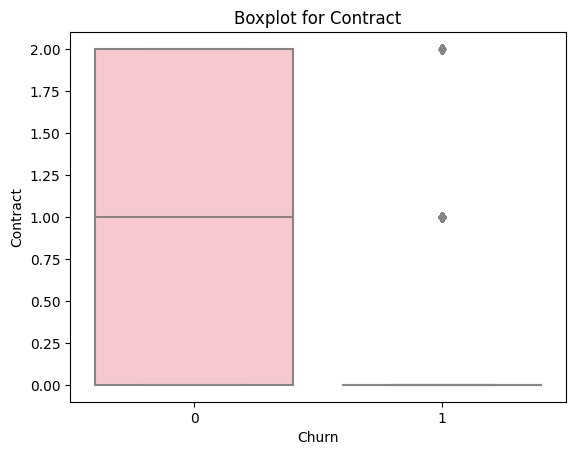

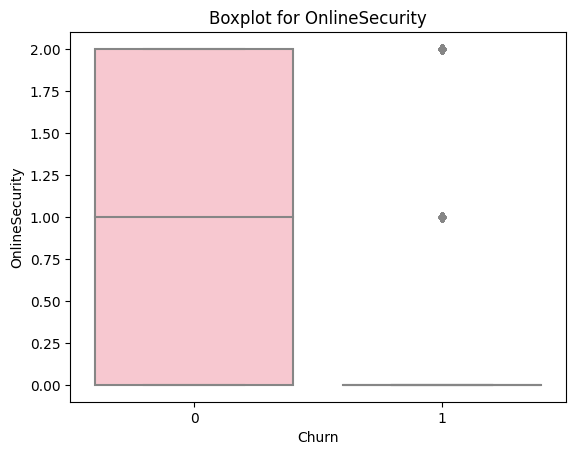

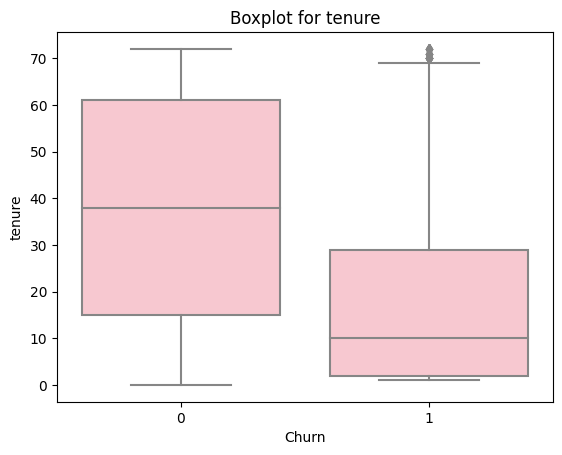

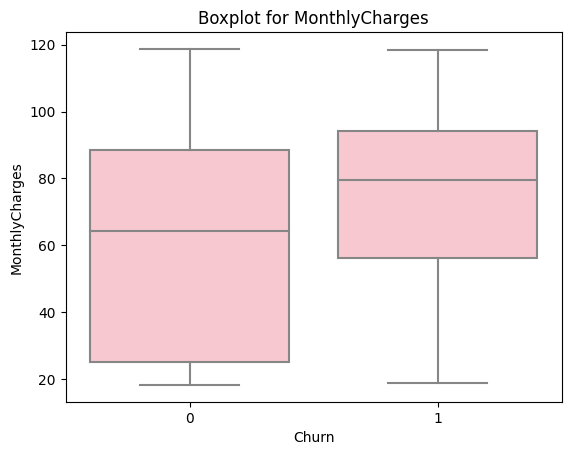

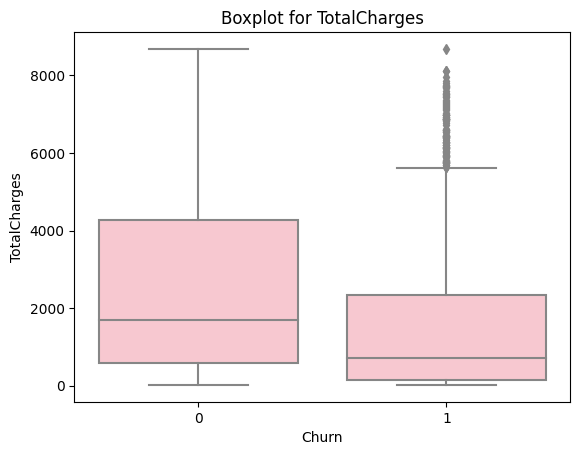

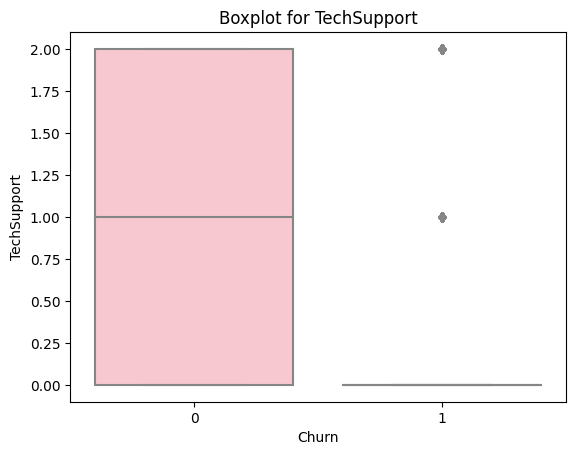

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#Manually specifying my top most 6 features
top_six_features = ['Contract', 'OnlineSecurity','tenure','MonthlyCharges','TotalCharges', 'TechSupport']

#Choosing colours for my boxplot and countplot
boxplot_color = 'pink'
countplot_color = 'Orange'

# Looping through each column in the top_six_features List
for column in top_six_features:
    # checks for numerical first and uses a boxplot if its numerical
    if final_churn_file[column].dtype != 'object':
        sns.boxplot(x='Churn', y=column, data=final_churn_file, palette={boxplot_color})
        plt.title(f'Boxplot for {column}')
        plt.show()
    else:
        # Countplot for Churn
        sns.countplot(x=column, hue='Churn', data=final_churn_file, color=countplot_color)
        plt.title(f'Countplot for {column}')
        plt.show()

EDA Interpretation

In [ ]:
#Per my statistics knowledge, here are my analysis from the resuslts of my EDA of plotting my top 6 features against churn
#With tenure, Churn has a median of 9 which is lower than the median for non-churn, which is approximately 38. This could suggest that customers with a higher tenure are not likely to churn.

#With monthly charges, Churn has a higher median value of about 81, while non-churn has a median of approx. 64. This could suggest people who experience higher monthly charges are more likely to churn.

#For Totalcharges, Churn has a median value of approx. 600, while non-churn has a median of approx. 1800. This could suggest that people with a higher Totalcharge value are likely to NOT churn.

#From the structure/nature of the boxplot seen, the churn boxplot has a negligible association with the following features: contract, online security, and Tech support.

Training (QUESTION 3)

In [17]:
!pip install tensorflow==2.8.0
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,roc_auc_score
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


top_features = ['Contract', 'tenure', 'OnlineSecurity', 'TotalCharges', 'MonthlyCharges', 'TechSupport']

# Extract the selected features and target variable
X = final_churn_file[top_features]
y = final_churn_file['Churn']

# Splitting data and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using functional API(keras) to create the model
def create_model(input_shape, hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.0001):
    inputs = Input(shape=(input_shape,))
    x = Dense(hidden_layer_sizes[0], activation=activation)(inputs)

    if len(hidden_layer_sizes) > 1:
        for units in hidden_layer_sizes[1:]:
            x = Dense(units, activation='relu')(x)

    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=solver, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Using KerasClassifier for easy hyperparameter fine-tuning within scikit-learn
keras_model = KerasClassifier(build_fn=create_model, input_shape=X_train.shape[1], verbose=0)

# Parameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(55, 45), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Cross-validation Initialization
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV and fitting the model
grid_search = GridSearchCV(keras_model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Select the best parameters and predict
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
y_pred = grid_search.predict(X_test_scaled)



<ipython-input-17-734ecc615cf0>:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, input_shape=X_train.shape[1], verbose=0)


Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'adam'}


Calculating the Model's Score and Evaluating the model's Accuracy(QUESTION 4)

In [18]:
%%writefile create_model.py
def create_model(input_shape, hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.0001):
    inputs = Input(shape=(input_shape,))
    x = Dense(hidden_layer_sizes[0], activation=activation)(inputs)

    if len(hidden_layer_sizes) > 1:
        for units in hidden_layer_sizes[1:]:
            x = Dense(units, activation='relu')(x)

    output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=output)
    model.compile(optimizer=solver, loss='binary_crossentropy', metrics=['accuracy'])
    return model

Overwriting create_model.py


Re-training and optimization again after calculating First AUC Score

In [19]:
# Optimizing the model with the best parameters obtained from Gridsearch
best_activation = best_params['activation']
best_alpha = best_params['alpha']
best_hidden_layer_sizes = best_params['hidden_layer_sizes']
best_solver = best_params['solver']

optimized_model = create_model(
    hidden_layer_sizes=best_hidden_layer_sizes,
    activation=best_activation,
    solver=best_solver,
    alpha=best_alpha,
    input_shape=X_train_scaled.shape[1]
)

# Retrain the optimized model on the entire training set with epoch=55
optimized_model.fit(X_train_scaled, y_train, epochs=65, batch_size=32, verbose=0)

# Test the optimized model on the test set and evaluate its perfromance
y_pred_optimized = (optimized_model.predict(X_test_scaled) > 0.5).astype(int).flatten()
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print("Accuracy on Test Set after optimization:", accuracy_optimized)

# Calculate the AUC score for the optimized model
y_pred_proba_optimized = optimized_model.predict(X_test_scaled).flatten()
auc_score_optimized = roc_auc_score(y_test, y_pred_proba_optimized)
print("AUC Score on Test Set for Optimized Model:", auc_score_optimized)

Accuracy on Test Set after optimization: 0.7991483321504613
AUC Score on Test Set for Optimized Model: 0.8497637334768702


Saving to Pickle File

In [20]:
import pickle

# Specifying the file name
pickle_filename = "optimized_model.pkl"

# Saving the model to the file
with open(pickle_filename, 'wb') as model_file:
    pickle.dump(optimized_model, model_file)




In [21]:
# Specifying the file name for scaler
pickle_filename = "scaler.pkl"

# Saving the scaler to the file
with open(pickle_filename, 'wb') as model_file:
    pickle.dump(scaler, model_file)

In [22]:
# Specifying the file name for scaler
import pickle
pickle_filename = "label.pkl"

# Saving the scaler to the file
with open(pickle_filename, 'wb') as model_file:
    pickle.dump(label_encoder, model_file)